# JEU DE DONNEES CREDIT RISK

## I-EXPLORATION DES DONNEES

In [ ]:
#importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#chargement du dataset
dataset='dataset1.csv'
df = pd.read_csv(dataset)

In [ ]:
dataset1='dataset2.csv'
df1=pd.read_csv(dataset1)

In [ ]:

#affichage des 5 premieres lignes du dataset
df.head(5)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,-0.903374,-0.114143,28.755261,4.019404,1.582287,1,3.931411,-0.691554,0,0,...,0,0,0,0,1,0,0,0,0,1
1,-1.060904,-0.911147,0.053606,-1.358650,0.040341,0,-0.657458,-0.938167,0,0,...,0,0,1,0,0,0,0,0,1,0
2,-0.430783,-0.911147,-0.919331,-0.646849,0.586973,1,3.744110,-0.691554,1,0,...,0,0,0,1,0,0,0,0,1,0
3,-0.745843,-0.009274,-0.189628,4.019404,1.332669,1,3.369508,-0.938167,0,0,...,0,0,0,1,0,0,0,0,1,0
4,-0.588313,-0.188358,0.783309,4.019404,1.029335,1,3.556809,-0.444942,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
#precisons  la variable cible
cible='loan_status'

In [ ]:
#importation des bibliotheque
from sklearn.model_selection import train_test_split
#ici
train, test = train_test_split(df, test_size = 0.2, random_state=42)

### division du jeu de données

In [ ]:
x_train = train.drop(cible, axis=1)
x_test =  test.drop(cible, axis=1)
y_train = train[cible]
y_test =  test[cible]

# II- Implémentation des différents modèles de classification

## 1-implementation de random forest

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_graphviz,export_text
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5072
           1       0.96      0.72      0.83      1445

    accuracy                           0.93      6517
   macro avg       0.94      0.86      0.89      6517
weighted avg       0.93      0.93      0.93      6517



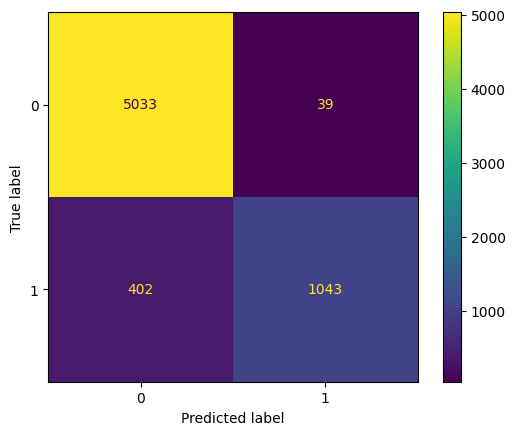

In [ ]:

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(x_train, y_train);

preds = rf.predict(x_test)

print(classification_report(y_test,preds))

from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test,preds)).plot()

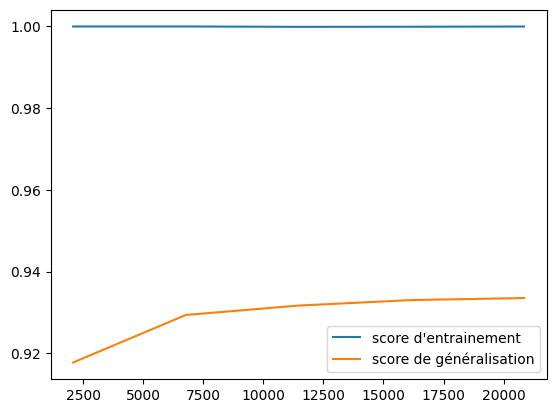

In [ ]:

N, train_score, val_score = learning_curve(rf, x_train, y_train)
plt.figure()
plt.plot(N, train_score.mean(axis=1), label = "score d'entrainement")
plt.plot(N, val_score.mean(axis=1), label = "score de généralisation")
plt.legend()

# III-OPTIMISATION DES MODELES

# 1-RANDOM FOREST

In [ ]:
param_grid = {
    'n_estimators': [8,16,20,30],  # Nombre d'arbres dans la forêt
    'max_depth': [None, 5, 10],  # Profondeur maximale de chaque arbre
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons requis pour diviser un nœud
    'min_samples_leaf': [1, 2, 4]  # Nombre minimum d'échantillons requis dans une feuille
}


In [ ]:
rf = RandomForestClassifier()


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)  # X_train et y_train représentent vos données d'entraînement


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [8, 16, 20, 30]})

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [ ]:
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(x_train, y_train)
y_pred = best_rf.predict(x_test) # Predictions
y_true = y_test # True values


In [ ]:
print(" les metriques pour  la regression random forest optimisee  sont :")
print( classification_report(y_true,y_pred))

 les metriques pour  la regression random forest optimisee  sont :
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      5072
           1       0.96      0.71      0.82      1445

    accuracy                           0.93      6517
   macro avg       0.94      0.85      0.89      6517
weighted avg       0.93      0.93      0.93      6517



matrice de confusion avec random forest optimisee:
 les metriques pour  RandomForest optimisee  est de :
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      5072
           1       0.96      0.71      0.82      1445

    accuracy                           0.93      6517
   macro avg       0.94      0.85      0.89      6517
weighted avg       0.93      0.93      0.93      6517



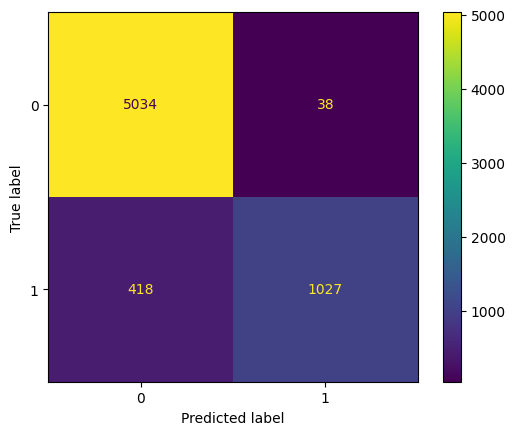

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print("matrice de confusion avec random forest optimisee:")
cm = confusion_matrix(y_true, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

print(" les metriques pour  RandomForest optimisee  est de :")
print( classification_report(y_true,y_pred))

# IV- intepretation des modeles

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 43.1 MB/s eta 0:00:00


In [ ]:
#importation de shap
import shap




# -RANDOM FOREST

In [ ]:
rf.fit(x_train,y_train)
explainer = shap.KernelExplainer(rf.predict, x_test[1:20],feature_names=df1.columns)
shap_values = explainer.shap_values(x_test[1:20])

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


  0%|          | 0/19 [00:00<?, ?it/s]

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


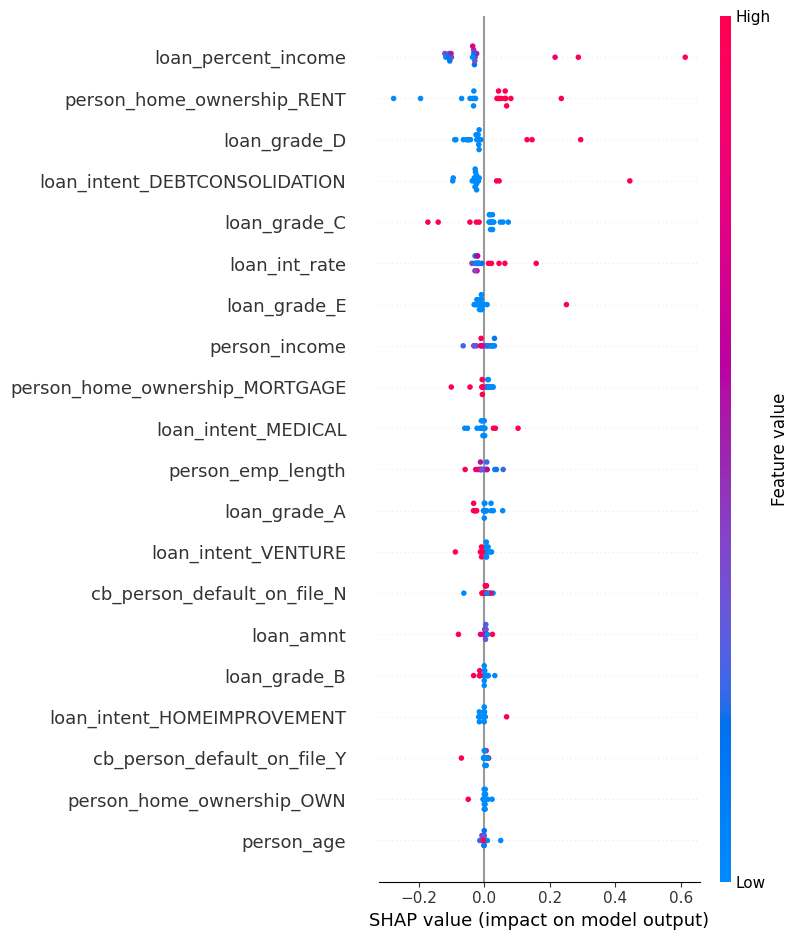

In [ ]:
shap.summary_plot(shap_values, x_test[1:20])

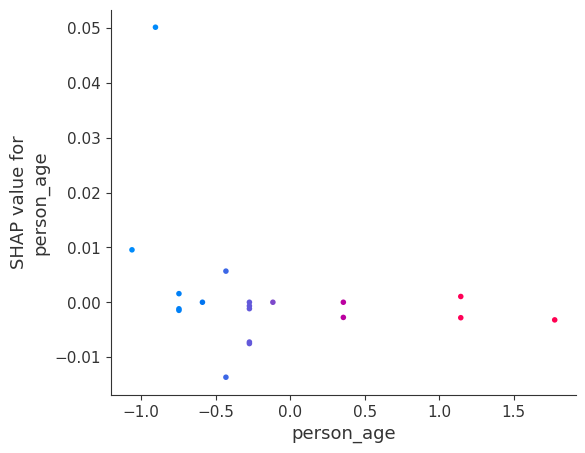

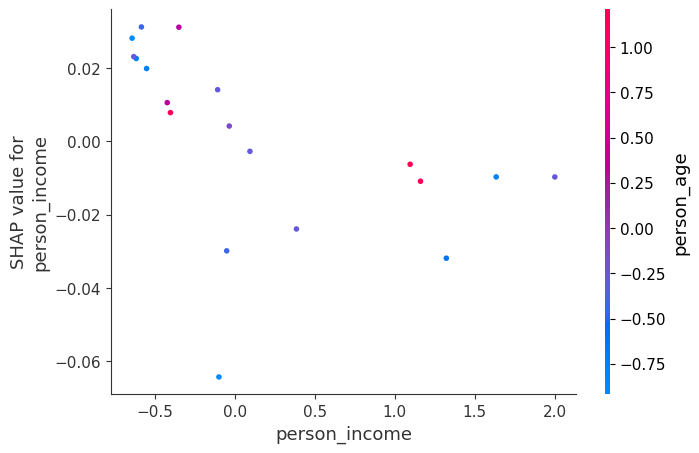

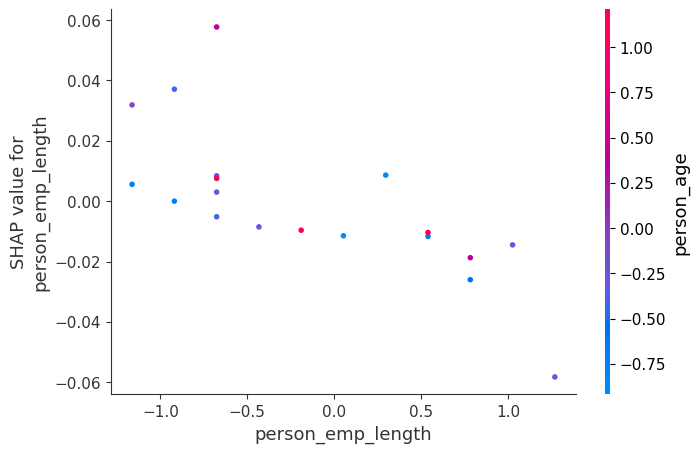

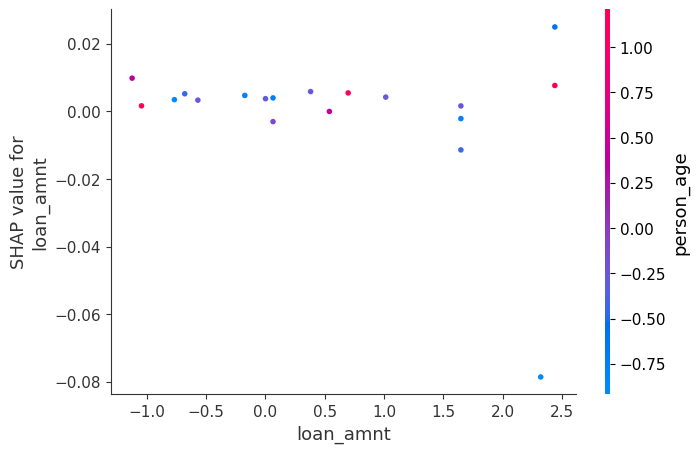

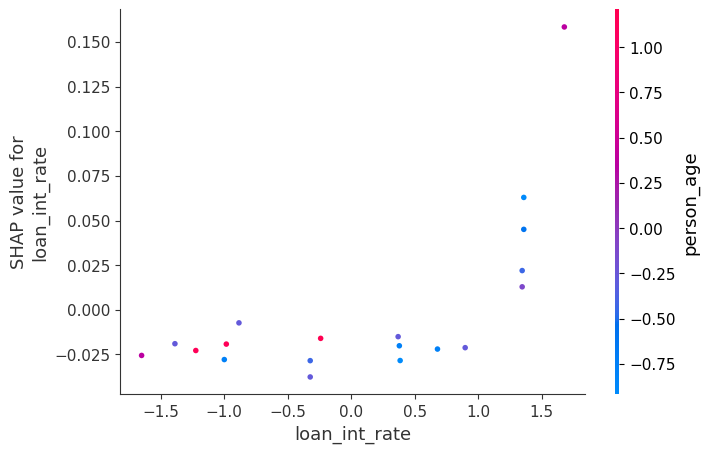

ValueError: ignored

In [ ]:
for i in df1.columns:
  shap.dependence_plot(i, shap_values, x_test[1:20])

sans loan grade

In [ ]:
df1.head(5)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,-0.903374,-0.114143,28.755261,4.019404,1.582287,1,3.931411,-0.691554,0,0,0,1,0,0,0,0,1,0,0,1
1,-1.060904,-0.911147,0.053606,-1.358650,0.040341,0,-0.657458,-0.938167,0,0,1,0,0,1,0,0,0,0,1,0
2,-0.430783,-0.911147,-0.919331,-0.646849,0.586973,1,3.744110,-0.691554,1,0,0,0,0,0,0,1,0,0,1,0
3,-0.745843,-0.009274,-0.189628,4.019404,1.332669,1,3.369508,-0.938167,0,0,0,1,0,0,0,1,0,0,1,0
4,-0.588313,-0.188358,0.783309,4.019404,1.029335,1,3.556809,-0.444942,0,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
cible="loan_status"

In [ ]:
from sklearn.model_selection import train_test_split
train1, test1 = train_test_split(df1, test_size = 0.2, random_state=42)


In [ ]:
x_train1 = train1.drop(cible, axis=1)
x_test1 =  test1.drop(cible, axis=1)
y_train1 = train1[cible]
y_test1 =  test1[cible]

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      5072
           1       0.92      0.68      0.78      1445

    accuracy                           0.92      6517
   macro avg       0.92      0.83      0.86      6517
weighted avg       0.92      0.92      0.91      6517



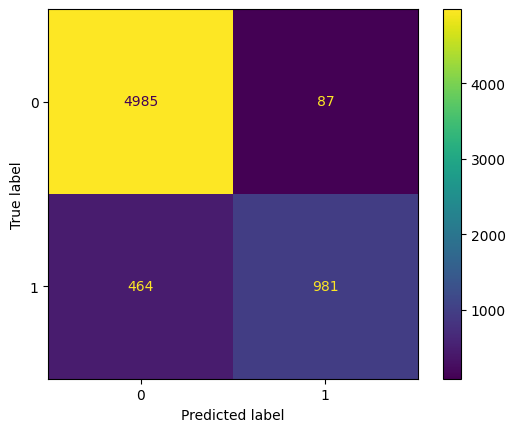

In [ ]:

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(x_train1, y_train1);

preds = rf.predict(x_test1)

print(classification_report(y_test1,preds))

from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test1,preds)).plot()

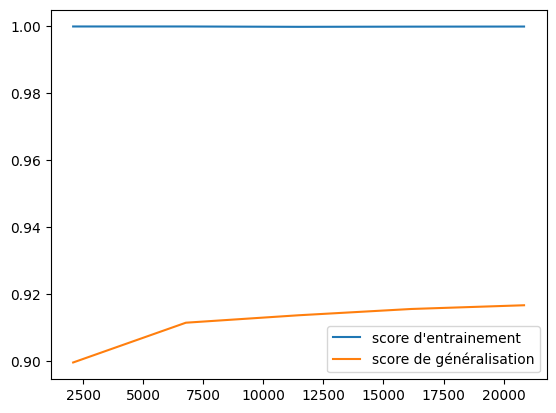

In [ ]:

N, train_score, val_score = learning_curve(rf, x_train1, y_train1)
plt.figure()
plt.plot(N, train_score.mean(axis=1), label = "score d'entrainement")
plt.plot(N, val_score.mean(axis=1), label = "score de généralisation")
plt.legend()

In [ ]:
param_grid = {
    'n_estimators': [8,16,20,30],  # Nombre d'arbres dans la forêt
    'max_depth': [None, 5, 10],  # Profondeur maximale de chaque arbre
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons requis pour diviser un nœud
    'min_samples_leaf': [1, 2, 4]  # Nombre minimum d'échantillons requis dans une feuille
}


In [ ]:
rf = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(x_train1, y_train1)  # X_train et y_train représentent vos données d'entraînement


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [8, 16, 20, 30]})

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [ ]:
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(x_train1, y_train1)
y_pred = best_rf.predict(x_test1) # Predictions
y_true = y_test1 # True values


In [ ]:
print(" les metriques pour  la regression random forest optimisee  sont :")
print( classification_report(y_true,y_pred))

 les metriques pour  la regression random forest optimisee  sont :
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      5072
           1       0.92      0.67      0.78      1445

    accuracy                           0.91      6517
   macro avg       0.91      0.83      0.86      6517
weighted avg       0.91      0.91      0.91      6517

